# What Can an RNN Predict?

Recurrent Neural Networks (RNNs) are universal function approximators, so a large enough neural network should be able to predict any deterministic function. Let's test this idea... we'll start with some simple deterministic functions and then make our way to the stock market and even pseudo-random generators!

In each case, we will do a 1-step prediction with a window size $w$. In other words, the neural network will look at the past $w$ values to predict the next value of the function.

** *Defining a simple 1-layer LSTM with Keras* **

In [106]:
import numpy as np, matplotlib.pyplot as plt
from utils import *

pretty_plotting_styles()
timer = Timer()

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Sinusoidal Curves

Time needed to run experiment: 758.021 s


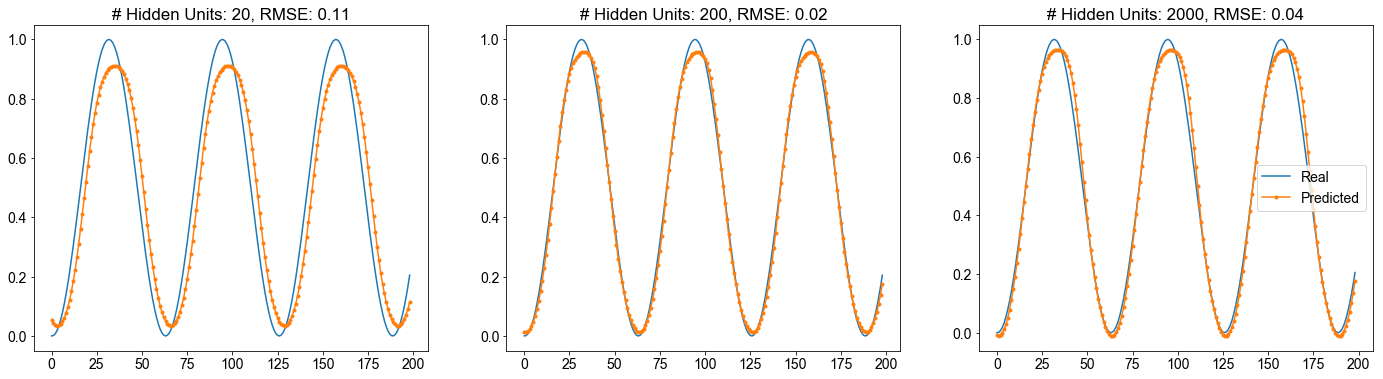

In [113]:
x = np.linspace(0,10,1000)
series = np.sin(10*x).reshape(-1,1)
hidden_units = [20, 200, 2000]

timer.start()
train_and_plot(series, hidden_units=hidden_units, figsize=[24,6])
timer.end_and_print()

# 2. Istanbul Stock Exchange (ISE)

A 1-step predictor. I should compare the error to that of some sort o fbaseline baseline.

Time needed to run experiment: 34.949 s


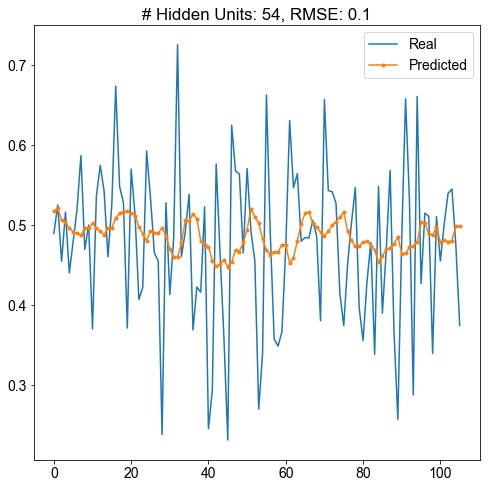

In [108]:
series = np.loadtxt('ise.csv')
hidden_units = [54]

timer.start()
train_and_plot(series, hidden_units=hidden_units, figsize=[8,8])
timer.end_and_print()

# 3. A Simple Pseudo-random Number Generator

This is based on John von Neumann's "middle-square method". Can an RNN learn it? 

Time needed to run experiment: 325.405 s


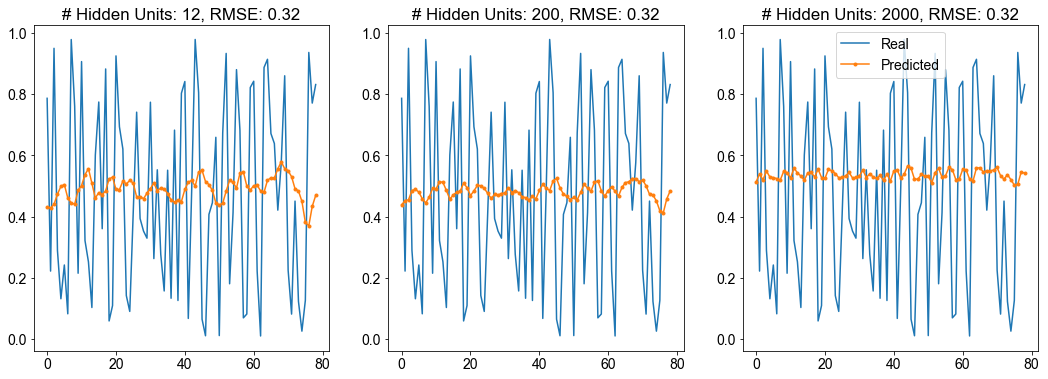

In [111]:
series = list()
number = 345435346
for _ in range(400):
    number = int(str(number * number).zfill(8)[2:8])
    series.append(number)
series = np.array(series)/1000000

hidden_units = [12, 200, 2000]

timer.start()
train_and_plot(series, hidden_units=hidden_units, figsize=[18,6])
timer.end_and_print()

# 4. Numpy's Random Number Generator

As expected, RNNs are not able to learn this number generator

Time needed to run experiment: 310.907 s


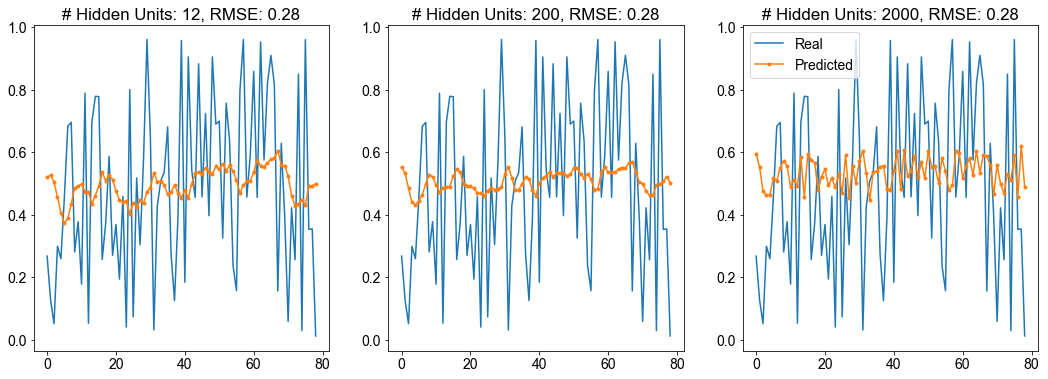

In [112]:
series = list()
np.random.seed(0)
for _ in range(400):
    series.append(np.random.random())
series = np.array(series)
    
hidden_units = [12, 200, 2000]

timer.start()
train_and_plot(series, hidden_units=hidden_units, figsize=[18,6])
timer.end_and_print()